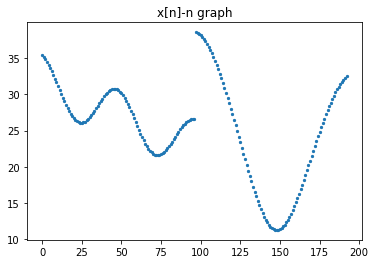

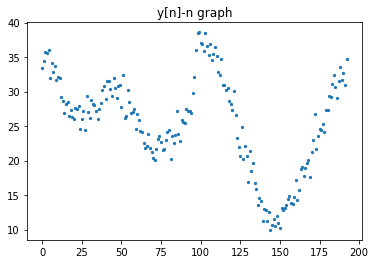

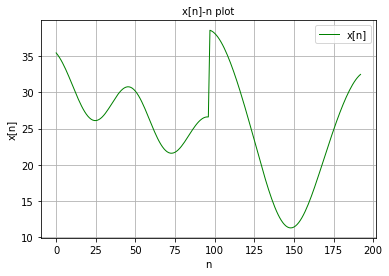

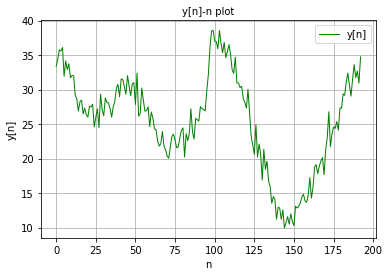

In [1]:
# x[n] : original given signal, y[n] : output signal which contains noise and blur

# Reading data from the csv file 
import csv
import matplotlib.pyplot as plt
import pandas as pd

x=[]
y=[]
with open('data.csv - data.csv.csv','r') as csvfile:
    lines = csv.reader(csvfile, delimiter=',')
    for row in lines:
        x.append(row[0])
        y.append(row[1])
xn=list(map(float,x[1:])) # x[n] signal
yn=list(map(float,y[1:])) # y[n] signal
n=[i for i in range(len(xn))]

# scatter plot of x[n]
plt.scatter(n,xn,s=5)
plt.title('x[n]-n graph')
plt.show()

# scatter plot of y[n]
plt.scatter(n,yn,s=5)
plt.title('y[n]-n graph')
plt.show()

# line plots

# Line plot of x[n]
plt.plot(n, xn, color = 'g', linestyle = 'solid', linewidth=1, markersize=2, label='x[n]')
plt.xlabel('n')
plt.ylabel('x[n]')
plt.title('x[n]-n plot', fontsize = 10)
plt.grid()
plt.legend()
plt.show()

# Line plot of y[n]
plt.plot(n, yn, color = 'g', linestyle = 'solid', linewidth=1, markersize=2, label='y[n]')
plt.xlabel('n')
plt.ylabel('y[n]')
plt.title('y[n]-n plot', fontsize = 10)
plt.grid()
plt.legend()
plt.show()





y1n is : 
34.499766666666666,35.448825,35.03376000000001,34.739979999999996,34.69718,34.12488,33.754400000000004,32.87872,32.907239999999994,32.474239999999995,31.738239999999998,30.717899999999997,29.75286,28.99022,28.281799999999997,27.731060000000003,27.46404,27.361720000000002,26.91542,26.73872,26.942539999999997,27.056420000000003,26.69594,26.689160000000005,26.61416,26.01256,26.307439999999996,26.809819999999995,26.85366,27.16962,27.900739999999995,27.643880000000003,27.676740000000002,27.63868,27.385559999999998,27.42156,27.85398,28.5543,29.145220000000002,29.949040000000004,30.58202,30.62534,30.33766,30.951099999999997,30.7435,30.27092,30.34452,30.68218,29.844079999999998,30.22186,29.63058,28.76874,28.616480000000003,28.7395,27.63234,27.796780000000002,27.997020000000003,26.876480000000004,26.533459999999998,26.340459999999997,25.80612,25.142200000000003,24.72482,23.74116,22.99332,22.91394,22.43682,22.1837,21.89256,21.47168,21.02802,21.3071,21.75822,22.22046,22.52486,22.52278,2

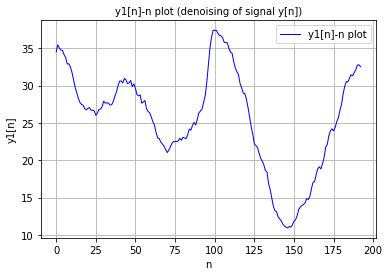

In [2]:
# SYSTEM 1 : (1) Denoising the signal y[n] to obtain signal y1n, (2) Deblurring the signal y1n to obtain signal x1[n]

# denoising the signal y[n] using averaging (kernel convolution can also be used)

yn=list(map(float,y[1:]))
y1n=[] # denoised y[n]


for i in range(len(yn)):
    if i==0:
        y1n.append((yn[0]+yn[1]+yn[2])/3)
    if i==1:
        y1n.append((yn[1]+yn[2]+yn[3]+yn[4])/4)
    elif i>=2 and i<191:
        # not including last two values of yn
        y1n.append((yn[i-2]+yn[i-1]+yn[i]+yn[i+1]+yn[i+2])/5)
    elif i==191:
        y1n.append((yn[190]+yn[191]+yn[192])/3)
    elif i==192:
        y1n.append((yn[189]+yn[190]+yn[191]+yn[192])/4)

        
print('y1n is : ')        
for i in range(len(y1n)):
    print(y1n[i],end=',')
    
# after denoising y1n is obtained which still contains blur   


# Plotting the graph of y1n
n=[i for i in range(len(xn))]        
plt.plot(n, y1n, color ='b',linestyle ='solid',label ="y1[n]-n plot",linewidth=1,markersize=2)
  

plt.xlabel('n')
plt.ylabel('y1[n]')
plt.title('y1[n]-n plot (denoising of signal y[n])', fontsize = 10)
plt.grid()
plt.legend()
plt.show()    
       

In [3]:
import cmath
import numpy as np

# Defining a function to calculate DTFT of h[n] at a specific value of w (omega)

hn=[1/16,4/16,6/16,4/16,1/16]
def dtft_h(hn,w):
    hi=0
    for n in range(-2,3):
        hk=hi+hn[n]*cmath.exp(-1*(complex(0,1)*w*n))
        hi=hk
    return hk    

C:\Users\dell\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


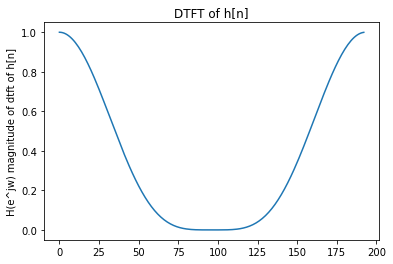

In [4]:
# Plot of DTFT of h[n] 

hn=[1/16,4/16,6/16,4/16,1/16]
H=[]
w=2*cmath.pi/193
for n in range(193):
    FT_hn= (2/16)*cmath.cos(2*w*n) + (8/16)*cmath.cos(w*n) + (6/16)
    H.append(FT_hn)
#print(H)

plt.plot([i for i in range(193)],H)
plt.ylabel('H(e^jw) magnitude of dtft of h[n]')
plt.title('DTFT of h[n]')
plt.show()


In [5]:
# Defining a function to calculate DTFT of y1n at w
def dtft(y1n,w):
    yi=0
    for n in range(193):
        yk=yi+y1n[n]*(cmath.exp(-1*(complex(0,1)*w*n)))
        yi=yk
    return yk    


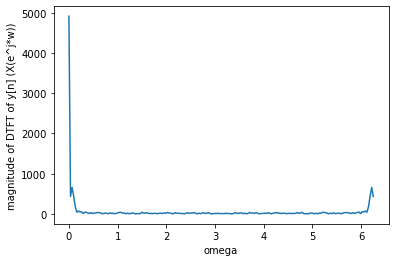

In [6]:
#for signal y[n]

# DTFT of y[n]
import cmath

yn=list(map(float,y[1:]))
K=[]

for k in range(193):
    yi=0
    
    for n in range(193):
        
        yk = yi + yn[n]*cmath.exp(-1*(complex(0,1)*((2*cmath.pi*k)/193)*n))
        yi=yk
    K.append(yk)    

#print(K)   
K_1=list(map(abs,K))
x_1=[(2*cmath.pi*k)/193 for k in range(193)]
plt.plot(x_1,K_1)
plt.xlabel('omega')
plt.ylabel('magnitude of DTFT of y[n] (X(e^j*w))')

plt.show()


In [7]:
# Defining a function to carry out deblurring of the denoised signal
def deb(y1n,hn):
    dw= 2*cmath.pi/193
    w=0
    deblsig=[0 for i in range(len(y1n))]
    
    while w <= 2*cmath.pi:
        
        if abs(dtft_h(hn,w))>0.59:         # 0.59 is chosen as a threshold value for better approximation
            div=dtft(y1n,w)/dtft_h(hn,w)   # term by term division of DTFTs to recover clear signal
         
            
            for n in range(0,len(y1n)):
                indtft=((1/(2*cmath.pi))*div*(cmath.exp(complex(0,1)*w*n)*dw))  # inverse DTFT 
                deblsig[n]+=indtft.real
        w+=dw
    
    return deblsig    # deblured signal obtained

In [8]:
# Deblurring of y1n to obtain x1[n]
x1n=deb(y1n,hn)
print('Signalx1[n] : ')
print(x1n)


Signalx1[n] : 
[34.48082944749477, 34.60308709251757, 35.35034286884276, 35.71742197152713, 34.920746978242406, 34.117865497237375, 34.00216142439208, 33.450915120677124, 32.11243128185129, 31.260876271978802, 31.113693111296215, 30.455324259186554, 29.26425401091957, 28.664633925787886, 28.520547565008858, 27.865596439693523, 27.002659104371162, 26.796767285923618, 26.92157417854801, 26.68890517320425, 26.41159492375803, 26.5658666093139, 26.803960670425276, 26.716875411114867, 26.54356579268971, 26.596905585791472, 26.75929862434916, 26.812938235542212, 26.813779132823278, 26.98124387198692, 27.328963986024018, 27.569678330609168, 27.57187562938645, 27.634586218088625, 27.924937508388503, 28.12761104179898, 28.147843692487612, 28.441972493426935, 29.139997402809975, 29.75220967929533, 30.136268775104657, 30.675141080607276, 31.2868563098637, 31.43494643378974, 31.14504799875835, 30.88048000199614, 30.618170245826487, 30.077718498369236, 29.47769130689858, 29.189944877321345, 29.10032

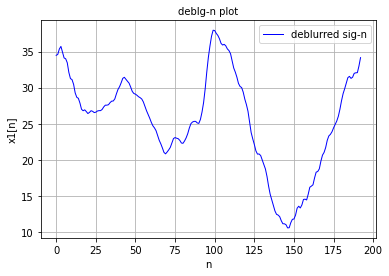

In [9]:
# plot of x1[n]
n=[i for i in range(len(xn))] 
plt.plot(n,deb(y1n,hn),color='b',linestyle ='solid',label="deblurred sig-n",linewidth=1,markersize=2)
  

plt.xlabel('n')
plt.ylabel('x1[n]')
plt.title('deblg-n plot', fontsize = 10)
plt.grid()
plt.legend()
plt.show()

In [10]:
# SYSTEM 2 : (1) Deblurring the signal y[n] to obtain signal y2n, (2) Denoise the signal y2n to obtain signal x2[n]

y2n=deb(yn,hn)
print('Signal y2n : ')
print(y2n)

Signal y2n : 
[34.33258165565074, 36.12881581494059, 35.43132359310453, 34.36480752399811, 35.357524928482164, 35.809676613692496, 33.653285882893854, 32.02917100194318, 32.783854571922326, 32.65171252964168, 30.3261275299431, 29.20609997218882, 30.105650644774766, 29.652367423723963, 27.489870240730855, 26.852616680006733, 27.782031123576328, 27.38988782630799, 25.958524492430108, 26.049171725275308, 27.185645363859848, 27.079381848791044, 26.151569730272126, 26.28999903321909, 27.097275712461766, 26.959684978221766, 26.19458970084929, 26.30204081719036, 27.183874303505068, 27.447685644319897, 26.993785371773743, 27.12968985533369, 28.003456759526742, 28.20236159413471, 27.49890375750736, 27.44646016802031, 28.393532280866218, 28.831018531285846, 28.56093371226671, 29.175325038180596, 30.6992464907279, 31.366469549463503, 31.06203768537964, 31.291739264361897, 31.890062108447637, 31.403610323606454, 30.17069420185834, 29.676306993014904, 29.75705851104708, 29.305963730729868, 28.61688

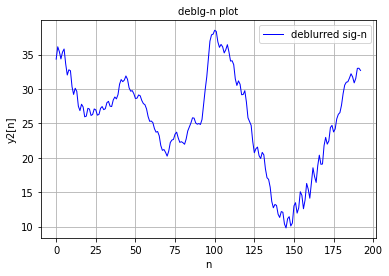

In [11]:
# Plot of deblurred signal y2n
plt.plot(n,y2n, color = 'b', linestyle = 'solid',label = "deblurred sig-n", linewidth=1, markersize=2)
  

plt.xlabel('n')
plt.ylabel('y2[n]')
plt.title('deblg-n plot', fontsize = 10)
plt.grid()
plt.legend()
plt.show()

Signal x2[n] : 
35.29757368789862,35.32061796513135,35.12301070323523,35.418429694843574,34.92332370843424,34.24289319020197,33.92670259978681,33.38554012001871,32.28883030326883,31.399393121127822,31.01468904969414,30.388391620054467,29.3560231622723,28.661320992285027,28.376507222562527,27.833354658869172,27.094586072610404,26.806446369519296,26.87305210628991,26.73252225133286,26.484858632125686,26.551153540283487,26.760774337720772,26.71558226059316,26.53862383100481,26.56871804838845,26.747493102445652,26.81757508881727,26.824395167527673,27.01141519842455,27.351698386891826,27.555395845017756,27.565639467655252,27.656174426904567,27.90894291201107,28.07445526636289,28.14616968998929,28.481453946123935,29.13201121066545,29.72659866438491,30.172802495203673,30.718963605622708,31.261911019676113,31.402783786251824,31.163628716730795,30.886482578257848,30.579546427594885,30.062726752051326,29.505382149076745,29.203634011931495,29.094017409458907,28.945171550331906,28.751028652014366,

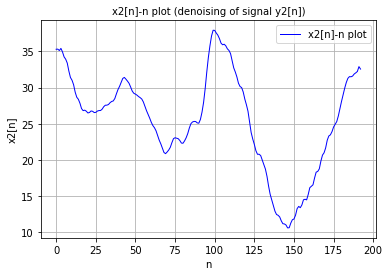

In [12]:
# denoising the signal y2[n] to obtain x2[n]

y2n=deb(yn,hn)
x2n=[] # denoised y2[n]
for i in range(len(y2n)):
    if i==0:
        x2n.append((y2n[0]+y2n[1]+y2n[2])/3)
    if i==1:
        x2n.append((y2n[1]+y2n[2]+y2n[3]+y2n[4])/4)
    elif i>=2 and i<191:
        # not including last two values of yn
        x2n.append((y2n[i-2]+y2n[i-1]+y2n[i]+y2n[i+1]+y2n[i+2])/5)
    elif i==191:
        x2n.append((y2n[190]+y2n[191]+y2n[192])/3)
    elif i==192:
        x2n.append((y2n[189]+y2n[190]+y2n[191]+y2n[192])/4)

print('Signal x2[n] : ')
for i in range(len(x2n)):
    print(x2n[i],end=',')
        
n=[i for i in range(len(x2n))]        
plt.plot(n, x2n, color='b',linestyle='solid',label = "x2[n]-n plot", linewidth=1, markersize=2)
  

plt.xlabel('n')
plt.ylabel('x2[n]')
plt.title('x2[n]-n plot (denoising of signal y2[n])', fontsize = 10)
plt.grid()
plt.legend()
plt.show()    

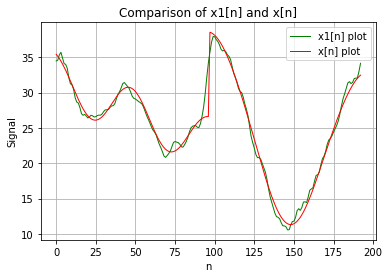

In [13]:
# Comparison of the signals obtained from system 1 and system 2 with the original input signal x[n]

# For System 1
# plot of x1[n] and x[n]
plt.plot(n, x1n, color = 'g', linestyle = 'solid',label = "x1[n] plot", linewidth=1, markersize=2)
plt.plot(n, xn, color = 'r', linestyle = 'solid',label = "x[n] plot", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.ylabel('Signal')
plt.xlabel('n')
plt.title('Comparison of x1[n] and x[n]')
plt.show() # the recovered signal is shown in green    

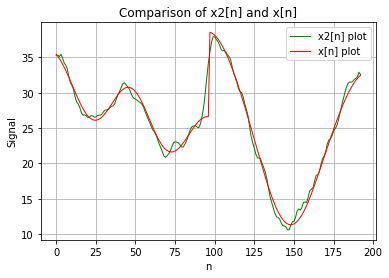

In [19]:
# For System 2
# plot of x2[n] and x[n]
plt.plot(n, x2n, color = 'g', linestyle = 'solid',label = "x2[n] plot", linewidth=1, markersize=2)
plt.plot(n, xn, color = 'r', linestyle = 'solid',label = "x[n] plot", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.ylabel('Signal')
plt.xlabel('n')
plt.title('Comparison of x2[n] and x[n]')
plt.show()    

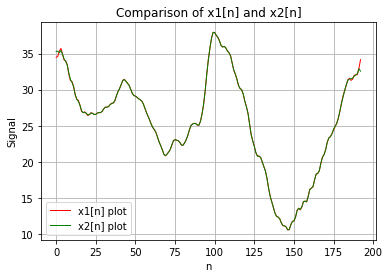

In [17]:
# System 1 and System 2 Comparison 
# plot of x1[n] and x2[n]
plt.plot(n, x1n, color = 'r', linestyle = 'solid',label = "x1[n] plot", linewidth=1, markersize=2)
plt.plot(n, x2n, color = 'g', linestyle = 'solid',label = "x2[n] plot", linewidth=1, markersize=2)

plt.grid()
plt.legend()
plt.ylabel('Signal')
plt.xlabel('n')
plt.title('Comparison of x1[n] and x2[n]')
plt.show()

# Both the obtained signals are similar 

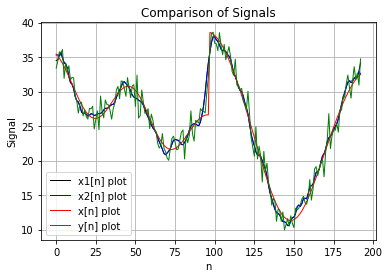

In [18]:
# Combined plot of all signals
plt.plot(n, x1n, color = 'k', linestyle = 'solid',label = "x1[n] plot", linewidth=1, markersize=2)
plt.plot(n, x2n, color = 'b', linestyle = 'solid',label = "x2[n] plot", linewidth=1, markersize=2)
plt.plot(n, xn, color = 'r', linestyle = 'solid',label = "x[n] plot", linewidth=1, markersize=2)
plt.plot(n, yn, color = 'g', linestyle = 'solid',label = "y[n] plot", linewidth=1, markersize=2)
plt.grid()
plt.legend()
plt.ylabel('Signal')
plt.xlabel('n')
plt.title('Comparison of Signals')
plt.show()
